# MCS 275 Spring 2024 Homework 10 Solutions

* Course Instructor: David Dumas


## Problem 2: Sort timing plots


Here are links to two CSV files you should download:
* [timing-random.csv](https://www.dumas.io/teaching/2024/spring/mcs275/data/timing-random.csv)
* [timing-nearlysorted.csv](https://www.dumas.io/teaching/2024/spring/mcs275/data/timing-nearlysorted.csv)

Each one contains timing data for three sorting algorithms:
* The `mergesort` we wrote in class
* The `quicksort` we wrote in class
* Python's built-in sorting algorithm

Each row of file `timing-random.csv` shows the time taken by each algorithm to sort a list that is randomly shuffled.  The first column of the file, `n`, is the length of the list for that test.

The file `timing-nearlysorted.csv` is similar, but for those tests the list used is in "nearly sorted order".

Write a Python script that does the following:
* Reads both CSV files, making suitable numpy arrays to store the data
* Makes two matplotlib plots:
    - One showing the timing tests for the three algorithms with random data, with the length of the list on the x axis and the time taken to sort on the y axis.
    - One showing the timing tests for the three algorithms with nearly sorted data (axes as above)
* Saves the plots to `timing-plot-random.png` and `timing-plot-nearlysorted.png`.

**In each plot** there should be a title, axes labels, a legend, and the data for each algorithm should appear in a different color.  Use dots as markers, and do **not** have the data points connected by lines.

Choose limits on the `y` axis so that if one of the tests takes much longer than all the others, it doesn't prevent the other two from being seen in detail.  (It's OK if that means the long-running one goes off the top of the plot.)

**Put your code in `hwk10prob2.py`.  Upload the code and both images `timing-plot-random.png` and `timing-plot-nearlysorted.png` to gradescope.**

### Solution

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import collections

def load_dataset(fn):
    "Load columns into a dictionary mapping column names to arrays"
    d = collections.defaultdict(list)
    with open(fn,"r") as fp:
        rdr = csv.DictReader(fp)
        for row in rdr:
            for col in row:
                if col == "n":
                    coltype = int
                else:
                    coltype = float
                d[col].append( coltype(row[col]) )
    for col in d:
        d[col] = np.array(d[col])
    return dict(d) # convert defaultdict to regular dict

In [12]:
rand_data = load_dataset("timing-random.csv")
ns_data = load_dataset("timing-nearlysorted.csv")

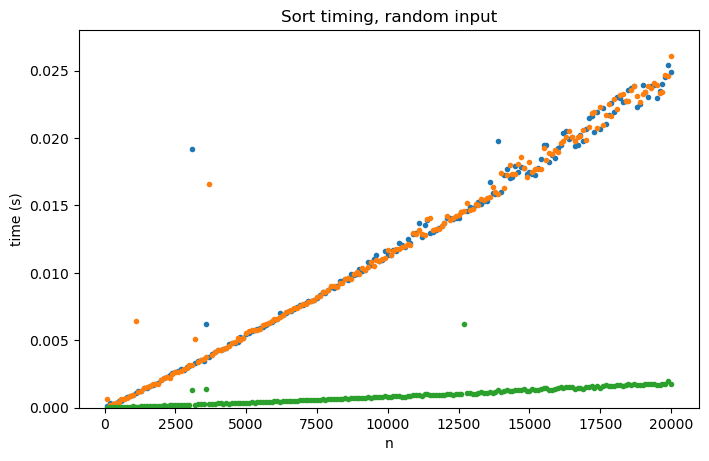

In [26]:
plt.figure(figsize=(8,5),dpi=100)
plt.plot(rand_data["n"],rand_data["quicksort"],marker=".",linestyle="none",label="quicksort")
plt.plot(rand_data["n"],rand_data["mergesort"],marker=".",linestyle="none",label="mergesort")
plt.plot(rand_data["n"],rand_data["list.sort"],marker=".",linestyle="none",label="list.sort")
plt.title("Sort timing, random input")
plt.xlabel("n")
plt.ylabel("time (s)")
plt.ylim(0,0.028)
plt.savefig("timing-plot-random.png")
plt.show()


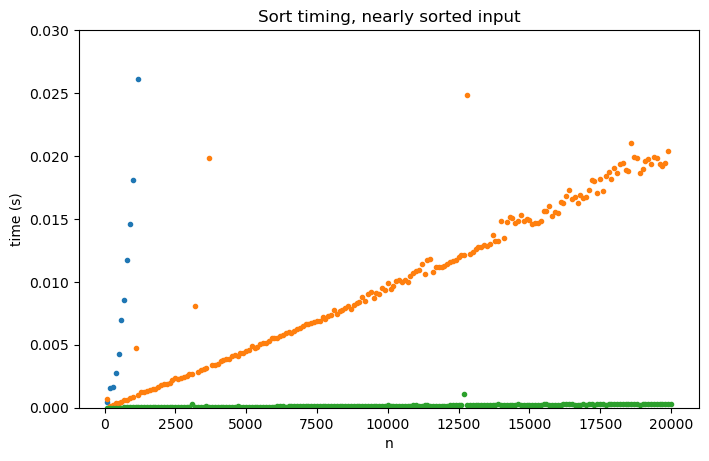

In [25]:
plt.figure(figsize=(8,5),dpi=100)
plt.plot(ns_data["n"],ns_data["quicksort"],marker=".",linestyle="none",label="quicksort")
plt.plot(ns_data["n"],ns_data["mergesort"],marker=".",linestyle="none",label="mergesort")
plt.plot(ns_data["n"],ns_data["list.sort"],marker=".",linestyle="none",label="list.sort")
plt.title("Sort timing, nearly sorted input")
plt.xlabel("n")
plt.ylabel("time (s)")
plt.ylim(0,0.03)
plt.savefig("timing-plot-nearlysorted.png")
plt.show()

## Problem 3: Offset printing

Work in `hwk10prob3.py`.

Write a Python script to generate a plot as similar to the one below as you can manage.  Try to do it with as few `for` loops as you can manage, favoring `numpy` features instead.  (The code I used to generate it has no loops.)

Hint: You should use `plt.scatter`.

**Put your code in `hwk10prob3.py`.  Upload the code and a PNG image of your plot to gradescope.**

![Scatter plot with dots of two colors and varying sizes](images/hw10-dots.png)



### Solution

Based on the idea that `np.meshgrid` returns two matrices; one increases along rows, the other along columns.  With a small position shift, these give the right behavior to make the pink and blue dot grids.

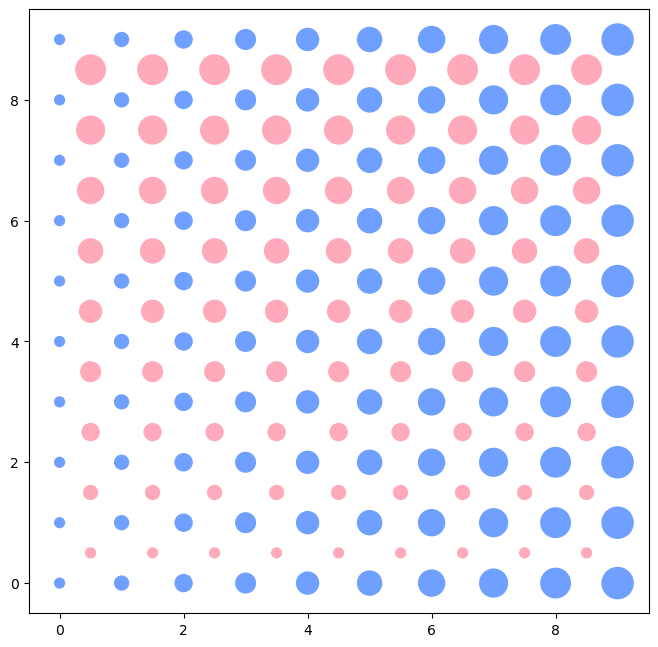

In [27]:
plt.figure(figsize=(8,8),dpi=100)
x = np.arange(10)
y = np.arange(10)
xx,yy = np.meshgrid(x,y)
plt.scatter(xx.ravel(),yy.ravel(),s=50*(1+xx.ravel()),c="#70A0FF")
plt.scatter((xx[:-1,:-1] + 0.5).ravel(),(yy[:-1,:-1] + 0.5).ravel(),s=50*(1+yy[:-1,:-1].ravel()),c="#FFAABB")
plt.xlim(-0.5,9.5)
plt.ylim(-0.5,9.5)
plt.show()

### Revision history

* 2024-04-02 Initial publication